#Team Project: Analysis of Airports’ TSA Complaints
#### UC Berkeley MIDS 2024: Data Science 200, Professor Ysis Tarter
#### Members:  Sooneui Kim, Carrie Li, Emily Lopez
#### April 17, 2024

## Imports and Data Cleaning

In [ ]:
# from utils import *  # Contains some helpers useful for dev/test/debugging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import string
from datetime import datetime as dt
from datetime import timedelta as td

In [ ]:
# Load the data
complaints_data = pd.read_csv("complaints-by-category.csv") # primary data set
airports_state = pd.read_csv("airports_and_states.csv") # secondary data set

In [ ]:
# Convert 'pdf_report_date' to datetime
complaints_data["year_month"] = pd.to_datetime(complaints_data["year_month"])

# Extract year and month from 'pdf_report_date'
complaints_data["year"] = complaints_data["year_month"].dt.year
complaints_data["month"] = complaints_data["year_month"].dt.month

In [ ]:
# Remove rows with NaN values from complaints_data
print("df shape before: ", complaints_data.shape)
complaints_data = complaints_data.dropna()
print("df shape after: ", complaints_data.shape)

df shape before:  (241588, 9)
df shape after:  (237546, 9)


In [ ]:
# Dropping 2024 data - incomplete data year
print("df shape before: ", complaints_data.shape)
complaints_data = complaints_data[complaints_data.year < 2024]
print("df shape after: ", complaints_data.shape)

df shape before:  (237546, 9)
df shape after:  (235749, 9)


In [ ]:
complaints_data.head()

,pdf_report_date,airport,category,year_month,count,clean_cat,clean_cat_status,year,month
0,2019-02,ABE,Hazardous Materials Safety,2015-01-01,0,Hazardous Materials Safety,original,2015,1
1,2019-02,ABE,Mishandling of Passenger Property,2015-01-01,0,Mishandling of Passenger Property,original,2015,1
2,2019-02,ABE,Hazardous Materials Safety,2015-02-01,0,Hazardous Materials Safety,original,2015,2
3,2019-02,ABE,Mishandling of Passenger Property,2015-02-01,0,Mishandling of Passenger Property,original,2015,2
4,2019-02,ABE,Hazardous Materials Safety,2015-03-01,0,Hazardous Materials Safety,original,2015,3


In [ ]:
# drop the count column to see the qualitative characteristics
complaints_data = complaints_data.drop(columns= ["pdf_report_date","category","clean_cat_status"], axis=1)
complaints_data.head()

,airport,year_month,count,clean_cat,year,month
0,ABE,2015-01-01,0,Hazardous Materials Safety,2015,1
1,ABE,2015-01-01,0,Mishandling of Passenger Property,2015,1
2,ABE,2015-02-01,0,Hazardous Materials Safety,2015,2
3,ABE,2015-02-01,0,Mishandling of Passenger Property,2015,2
4,ABE,2015-03-01,0,Hazardous Materials Safety,2015,3


In [ ]:
complaints_data.airport.describe()


count     235749
unique       448
top          JFK
freq        1736
Name: airport, dtype: object

### EDA

In [ ]:
# Drop airports with complaint counts less than 1000
print("df shape before: ", complaints_data.shape)
over_1000=complaints_data.groupby("airport").filter(lambda x: len(x) >=1000)
print("df shape before: ", over_1000.shape)

df shape before:  (235749, 6)
df shape before:  (88382, 6)


In [ ]:
over_1000.head()

,airport,year_month,count,clean_cat,year,month
1162,ABQ,2015-01-01,0,Civil Rights,2015,1
1163,ABQ,2015-01-01,1,Customer Service,2015,1
1164,ABQ,2015-01-01,1,Expedited Passenger Screening Program,2015,1
1165,ABQ,2015-01-01,0,Locks,2015,1
1166,ABQ,2015-01-01,8,Mishandling of Passenger Property,2015,1


In [ ]:
air_group = complaints_data[["airport", "clean_cat"]].groupby("airport").count().sort_values(by = "clean_cat", ascending = False).reset_index().rename(columns = {"clean_cat":"num_complaints"})
print(air_group.shape)
air_group.head(5)

(448, 2)


,airport,num_complaints
0,JFK,1736
1,EWR,1679
2,ATL,1672
3,LAX,1670
4,MCO,1665


In [ ]:
# Reducing DF to include complaint categories >= 1000
print("df shape before: ", over_1000.shape)
over_1000 = over_1000.groupby("clean_cat").filter(lambda x: len(x) >=1000)
print("df shape after: ", over_1000.shape)


df shape before:  (88382, 6)
df shape after:  (83636, 6)


In [ ]:
over_1000.head()

,airport,year_month,count,clean_cat,year,month
1162,ABQ,2015-01-01,0,Civil Rights,2015,1
1163,ABQ,2015-01-01,1,Customer Service,2015,1
1164,ABQ,2015-01-01,1,Expedited Passenger Screening Program,2015,1
1165,ABQ,2015-01-01,0,Locks,2015,1
1166,ABQ,2015-01-01,8,Mishandling of Passenger Property,2015,1


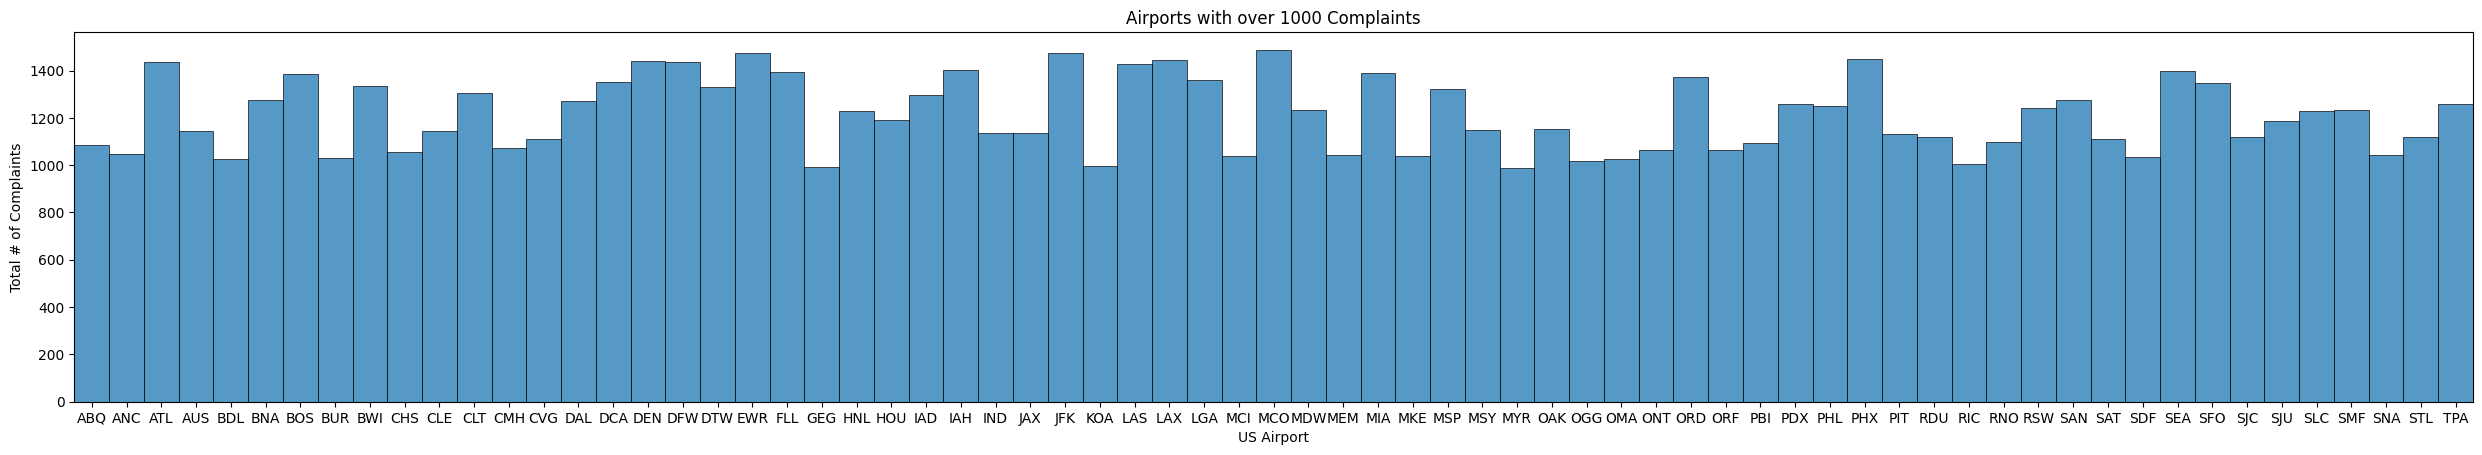

In [ ]:
# plotting figure
plt.figure()
sns.histplot(data=over_1000["airport"])

# setting labels
labels = list(over_1000["airport"].unique())
plt.xticks(labels)

# adjusting spacing between tick labels
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*len(labels)+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

# adding title and saving
plt.title("Airports with over 1000 Complaints")
plt.ylabel("Total # of Complaints")
plt.xlabel("US Airport")
# plt.savefig(".png")
plt.show()

## Initial Questions

### 1. What are the top 10 airports with the most complaints?

In [ ]:
top_complaints = complaints_data["airport"].value_counts().nlargest(10)
top_complaints

airport
JFK    1736
EWR    1679
ATL    1672
LAX    1670
MCO    1665
DEN    1639
PHX    1588
ORD    1579
DFW    1576
IAH    1540
Name: count, dtype: int64

In [ ]:
dfimage = pd.DataFrame(top_complaints)
dfimage

,count
airport,
JFK,1736
EWR,1679
ATL,1672
LAX,1670
MCO,1665
DEN,1639
PHX,1588
ORD,1579
DFW,1576


### 2. What are the top 10 airports with the least complaints?

In [ ]:
top_least_complaints = complaints_data["airport"].value_counts().nsmallest(10)
top_least_complaints

airport
CEF     3
SLE     3
WRL     3
JRB     3
AHN     3
UTA     9
GRO     9
IGM     9
MBL    11
GDV    12
Name: count, dtype: int64

In [ ]:
dfimage = pd.DataFrame(top_least_complaints)
dfimage

,count
airport,
CEF,3
SLE,3
WRL,3
JRB,3
AHN,3
UTA,9
GRO,9
IGM,9
MBL,11


### 3. What are the top 10 types of complaints?

In [ ]:
top_complaint_types = complaints_data["clean_cat"].value_counts().nlargest(10)
top_complaint_types

clean_cat
Mishandling of Passenger Property        30947
Screening                                28817
Customer Service                         28094
Property - Special Handling              21847
Patdown                                  21155
Civil Rights                             18389
Persons w/ Disabilities (PWD)            18288
Locks                                    16564
Expedited Passenger Screening Program    14227
Lost and Found                            7285
Name: count, dtype: int64

### 4. What month has the highest number of complaints?

12


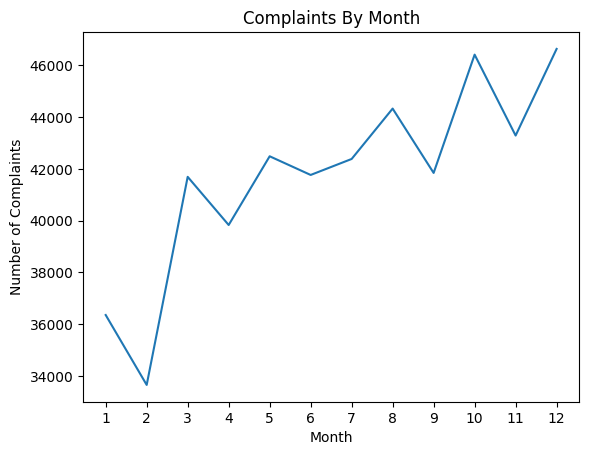

In [ ]:
#monthly_complaints = (over_1000.groupby("month")).sum()
monthly_complaints = over_1000.groupby("month")["count"].sum()
highest_complaint_month = monthly_complaints.idxmax()
print(highest_complaint_month)

# Plot the data
plt.title("Complaints By Month")
monthly_complaints.plot(kind="line", xlabel="Month", ylabel="Number of Complaints")
plt.xticks(range(1, 13))
plt.show()

### 5. How has the number of complaints grown over the year?

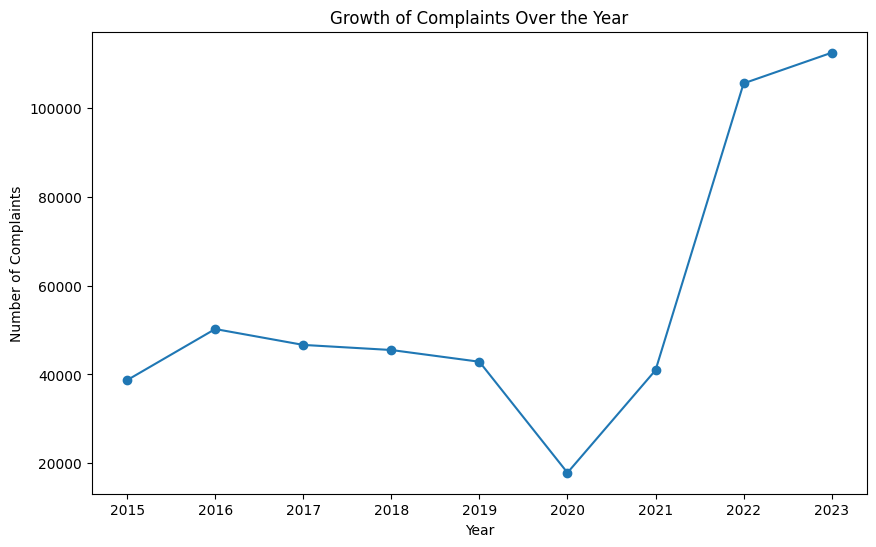

In [ ]:
yearly_complaints = over_1000.groupby("year")["count"].sum()


plt.figure(figsize=(10, 6))
plt.plot(yearly_complaints.index, yearly_complaints.values, marker="o")

plt.title("Growth of Complaints Over the Year")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")

#plt.xticks(range(2019, 2023))

plt.show()

## TSA Complaints by Year


In [ ]:
over_1000.clean_cat.unique()

array(['Civil Rights', 'Customer Service',
       'Expedited Passenger Screening Program', 'Locks',
       'Mishandling of Passenger Property', 'Patdown',
       'Persons w/ Disabilities (PWD)', 'Screening',
       'Identification (ID) Requirements', 'Prohibited & Permitted Items',
       'Property - Special Handling', 'Request for Assistance',
       'Lost and Found', 'Airline', 'No Jurisdiction', 'Claims',
       'Advanced Imaging Technology (AIT)',
       'Additional Information Required/Insufficient Information',
       'Hazardous Materials Safety'], dtype=object)

In [ ]:
# Subsetting the DF by complaints types - Property related, Screening related and Others
tsac_property = over_1000[(over_1000.clean_cat=="Mishandling of Passenger Property") | (over_1000.clean_cat=="Property - Special Handling") |
                               (over_1000.clean_cat=="Locks") | (over_1000.clean_cat=="Lost and Found")|
                               (over_1000.clean_cat=="Prohibited & Permitted Items") | (over_1000.clean_cat== "Hazardous Materials Safety")]
tsac_property.shape

(29846, 6)

In [ ]:
tsac_screening = over_1000[(over_1000.clean_cat=="Screening") | (over_1000.clean_cat=="Patdown") |
                                (over_1000.clean_cat=="Expedited Passenger Screening Program") |
                                (over_1000.clean_cat=="Advanced Imaging Technology (AIT)") |
                                (over_1000.clean_cat=="Identification (ID) Requirements")]
tsac_screening.shape

(22475, 6)

In [ ]:
tsac_other = over_1000[(over_1000.clean_cat=="Customer Service") | (over_1000.clean_cat=="Civil Rights") |
                            (over_1000.clean_cat=="Persons w/ Disabilities (PWD)") | (over_1000.clean_cat=="No Jurisdiction")|
                            (over_1000.clean_cat=="Airline") | (over_1000.clean_cat=="Request for Assistance")|
                            (over_1000.clean_cat=="Claims") | (over_1000.clean_cat=="Additional Information Required/Insufficient Information")]
tsac_other.shape

(31315, 6)

In [ ]:
tsac_property_count_by_year = tsac_property["count"].groupby(tsac_property["year"])
tsac_screening_count_by_year = tsac_screening["count"].groupby(tsac_screening["year"])
tsac_other_count_by_year = tsac_other["count"].groupby(tsac_other["year"])

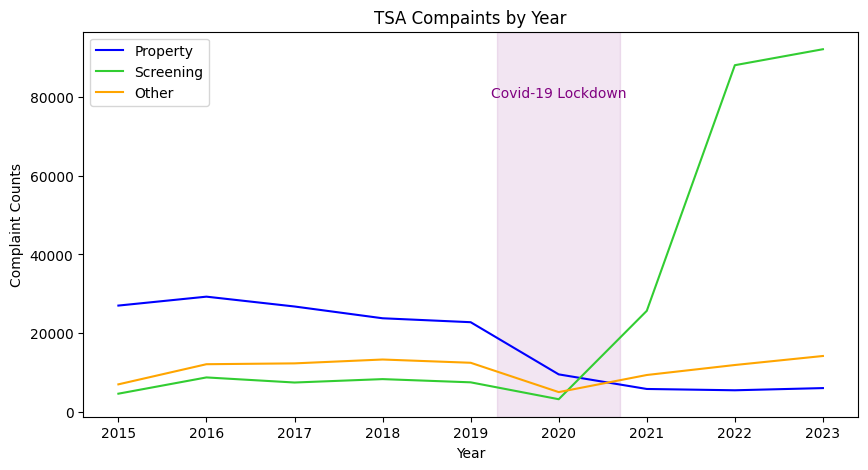

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(tsac_property_count_by_year.sum(), color = "blue", label="Property")
plt.plot(tsac_screening_count_by_year.sum(), color = "limegreen", label="Screening" )
plt.plot(tsac_other_count_by_year.sum(), color = "orange", label="Other" )

x1, x2 = 2019.3, 2020.7
ax.axvspan(x1, x2, color = 'purple', alpha=0.1)
ax.text(2019.23, 80000, 'Covid-19 Lockdown', color ='purple', fontsize = 10)

plt.title("TSA Compaints by Year")
plt.xlabel("Year")
plt.ylabel("Complaint Counts")
plt.legend()
plt.show()

### Top 5 airports that had the highest scanning related complaints overall to see if the large increse after 2021 is due to any particualr airport

In [ ]:
# sorting airports by screening complaint to get 10 airports with highest screening complaints
tsac_screening  = tsac_screening.rename(columns = {"count":"num_complaints"})#rename count to num_complaints to prevent confusion
tsac_screening2 = tsac_screening[["clean_cat","airport", "num_complaints"]].groupby("airport").sum(numeric_only=True).sort_values(by="num_complaints", ascending = False)
tsac_screening2.head(10)

,num_complaints
airport,
EWR,13414
DEN,11187
ATL,11076
LAX,10440
ORD,10263
JFK,9368
MCO,9092
SFO,8223
SEA,7645


In [ ]:
# Subsetting top 5 apirports with most screening related complaints
BOS = tsac_screening[(tsac_screening.airport=="BOS")]
EWR = tsac_screening[(tsac_screening.airport=="EWR")]
DEN = tsac_screening[(tsac_screening.airport=="DEN")]
ATL = tsac_screening[(tsac_screening.airport=="ATL")]
LAX = tsac_screening[(tsac_screening.airport=="LAX")]


In [ ]:
# Grouping each df subset by year for graphing
BOSbyYear  = BOS["num_complaints"].groupby(BOS["year"]).sum()
EWRbyYear  = EWR["num_complaints"].groupby(EWR["year"]).sum()
DENbyYear  = DEN["num_complaints"].groupby(DEN["year"]).sum()
ATLbyYear  = ATL["num_complaints"].groupby(ATL["year"]).sum()
LAXbyYear  = LAX["num_complaints"].groupby(LAX["year"]).sum()

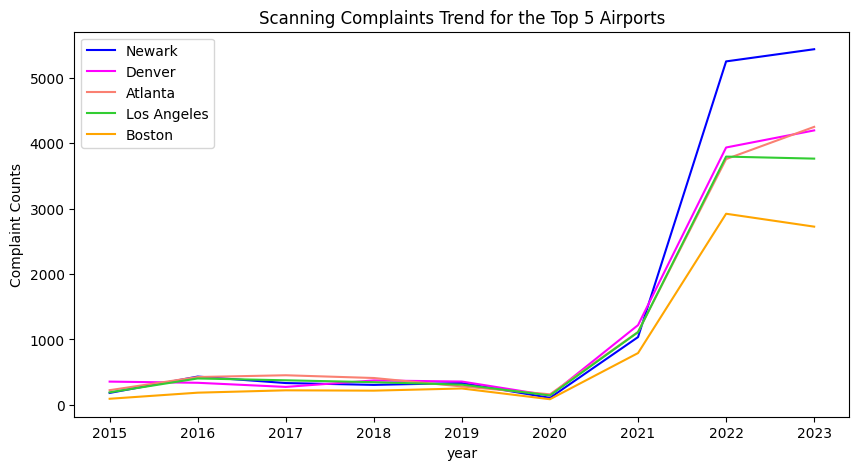

In [ ]:
plt.figure(figsize=(10,5))
plt.plot (EWRbyYear, color = "blue", label="Newark")
plt.plot (DENbyYear, color = "fuchsia", label="Denver")
plt.plot (ATLbyYear, color = "salmon", label="Atlanta")
plt.plot(LAXbyYear, color = "limegreen", label="Los Angeles" )
plt.plot(BOSbyYear, color = "orange", label="Boston" )
plt.title("Scanning Complaints Trend for the Top 5 Airports")
plt.xlabel("year")
plt.ylabel("Complaint Counts")
plt.legend()
plt.show()

### Top 4 busiest airports in the US are Atlanta, Dallas-Fortworth, Denver and Orlando, in that order.  Is the traffic size the only driver behind complaint counts?

In [ ]:
#Build DF subsets for the top 4 busiest airports
complaints_data2= over_1000.rename(columns = {"count":"num_complaints"}) # renaming the count column to reduce confusion
complaints_data2= complaints_data2[["airport","num_complaints","year"]] # selecting only the col of interest

DEN2 = complaints_data2[(complaints_data2.airport=="DEN")]
ORD2 = complaints_data2[(complaints_data2.airport=="ORD")]
DFW2 = complaints_data2[(complaints_data2.airport=="DFW")]
ATL2 = complaints_data2[(complaints_data2.airport=="ATL")]

In [ ]:
# Data frame clean up for grphing needs
Den3 = pd.DataFrame(DEN2.year.value_counts()[0:])
Den3.index = pd.to_datetime(Den3.index, format="%Y")
Den3.columns=["Denver"]
Den3=Den3.reset_index()

Ord3 = pd.DataFrame(ORD2.year.value_counts()[0:])
Ord3.index = pd.to_datetime(Ord3.index, format="%Y")
Ord3.columns=["Orlando"]
Ord3=Ord3.reset_index()

Dfw3 = pd.DataFrame(DFW2.year.value_counts()[0:])
Dfw3.index = pd.to_datetime(Dfw3.index, format="%Y")
Dfw3.columns=["Dallas-FortWorth"]
Dfw3=Dfw3.reset_index()

Atl3 = pd.DataFrame(ATL2.year.value_counts()[0:])
Atl3.index = pd.to_datetime(Atl3.index, format="%Y")
Atl3.columns=["Atlanta"]
Atl3=Atl3.reset_index()

In [ ]:
# Merging airport data for seaborn plotting
complaints=pd.melt(pd.concat([Atl3, Den3, Dfw3, Ord3]), id_vars=["year"])
complaints.year=complaints.year.dt.strftime("%Y") #reformating the year column
complaints=complaints.sort_values(by="year") # resorting by year for graphing
complaints  = complaints.rename(columns = {"variable":"Airport"}) # renaming column variable

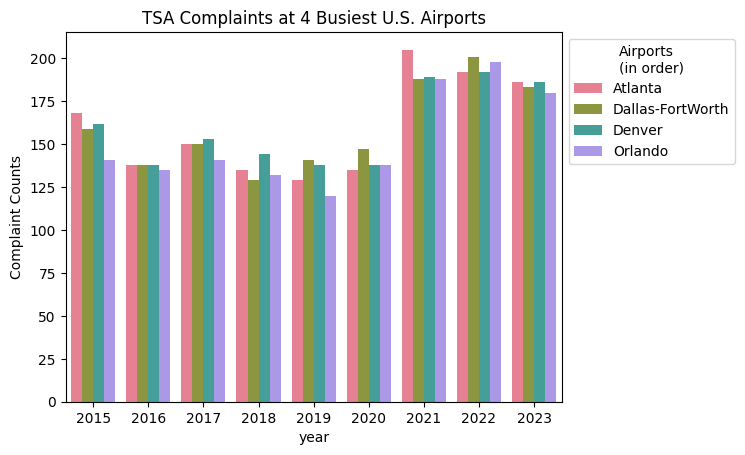

In [ ]:
# Bar Plot using seaborn
fig, ax = plt.subplots(1,1)
hue_order=["Atlanta", "Dallas-FortWorth", "Denver","Orlando"]
sns.set_palette("Accent", 3)
sns.barplot(data=complaints, x="year", y="value", hue= "Airport",hue_order=hue_order, errorbar=None)
ax.set_title("TSA Complaints at 4 Busiest U.S. Airports")
ax.set_xlabel("year")
ax.set_ylabel("Complaint Counts")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1), title="Airports\n(in order)")


## Complaints by States

### Some states have more than 1 airport, so the number of complaints by state can vary drastically.

In [ ]:
airports_state = pd.read_csv("airports_and_states.csv")
print("Size of airports state dataframe:", airports_state.shape)
airports_state.head()

Size of airports state dataframe: (180, 5)


,Unnamed: 0,state,airport_code,airport_name,num_airports
0,0,Alabama,BHM,Birmingham International Airport,5
1,1,Alabama,DHN,Dothan Regional Airport,5
2,2,Alabama,HSV,Huntsville International Airport,5
3,3,Alabama,MOB,Mobile Regional Airport,5
4,4,Alabama,MGM,Montgomery Regional Airport,5


In [ ]:
# need to rename airport_code to airport in order to merge
# dropped unamed column because not needed
airports_state = airports_state.drop(columns = "Unnamed: 0").rename(columns={"airport_code":"airport"})

In [ ]:
airports_state.head()

,state,airport,airport_name,num_airports
0,Alabama,BHM,Birmingham International Airport,5
1,Alabama,DHN,Dothan Regional Airport,5
2,Alabama,HSV,Huntsville International Airport,5
3,Alabama,MOB,Mobile Regional Airport,5
4,Alabama,MGM,Montgomery Regional Airport,5


In [ ]:
print("df shape before: ", over_1000.shape)
print("number of airport_codes before:", len(over_1000["airport"].unique()))
airport_codes_og = over_1000["airport"].unique()
over_1000 = over_1000.merge(airports_state, how = "left", on = "airport")
airport_codes_after = over_1000["airport"].unique()
print("df shape after: ", over_1000.shape)
print("number of airport_codes after:", len(over_1000["airport"].unique()))
print("number of states included in the over_1000 df:", len(over_1000["state"].unique()))
print("Are all the airport codes kept/the same?", airport_codes_og == airport_codes_after)

df shape before:  (83636, 6)
number of airport_codes before: 69
df shape after:  (86318, 9)
number of airport_codes after: 69
number of states included in the over_1000 df: 36
Are all the airport codes kept/the same? [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [ ]:
over_1000.head()

,airport,year_month,count,clean_cat,year,month,state,airport_name,num_airports
0,ABQ,2015-01-01,0,Civil Rights,2015,1,New Mexico,Albuquerque International Airport,2.0
1,ABQ,2015-01-01,1,Customer Service,2015,1,New Mexico,Albuquerque International Airport,2.0
2,ABQ,2015-01-01,1,Expedited Passenger Screening Program,2015,1,New Mexico,Albuquerque International Airport,2.0
3,ABQ,2015-01-01,0,Locks,2015,1,New Mexico,Albuquerque International Airport,2.0
4,ABQ,2015-01-01,8,Mishandling of Passenger Property,2015,1,New Mexico,Albuquerque International Airport,2.0


In [ ]:
over_1000.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86318 entries, 0 to 86317
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   airport       86318 non-null  object        
 1   year_month    86318 non-null  datetime64[ns]
 2   count         86318 non-null  int64         
 3   clean_cat     86318 non-null  object        
 4   year          86318 non-null  int32         
 5   month         86318 non-null  int32         
 6   state         82789 non-null  object        
 7   airport_name  82789 non-null  object        
 8   num_airports  82789 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(4)
memory usage: 5.3+ MB


### Looking at the top 10 states and aiport pairs with the most complaints and at the top 10 states and airport pairs with the least complaints.

In [ ]:
# Group by 'state and 'airport', summing the counts
top_complaints = (
    over_1000.groupby(["state", "airport"])["count"].sum().nlargest(10)
)
print("Top 10 state and airport groups with the most complaints:")
print(top_complaints)
top_least_complaints = (
    over_1000.groupby(["state", "airport"])["count"].sum().nsmallest(10)
)
print("Top 10 state and airport groups with the least complaints:")
print(top_least_complaints)


Top 10 state and airport groups with the most complaints:
state       airport
California  LAX        24455
New York    JFK        24327
New Jersey  EWR        23945
Georgia     ATL        23198
Florida     MCO        22001
Colorado    DEN        18753
Illinois    ORD        17944
Nevada      LAS        15744
Texas       DFW        15705
Florida     MIA        14707
Name: count, dtype: int64
Top 10 state and airport groups with the least complaints:
state           airport
South Carolina  MYR        1036
Hawaii          KOA        1371
California      BUR        1484
Kentucky        SDF        1553
Washington      GEG        1689
Nevada          RNO        1772
Tennessee       MEM        1791
Virginia        ORF        1821
Alaska          ANC        1961
South Carolina  CHS        1995
Name: count, dtype: int64


### Top 10 States with the most and the least complaints

In [ ]:
# print the total number of airports along with these columns too to see how many
# airports the states with the most complaints have.
print("Top 10 states with the most complaints:")
print(over_1000.groupby(["state"])["count"].sum().nlargest(10))
# print(over_1000.groupby(["state"]).count().sort_values(by=num_airports, ascending = False).head(10))
print("Top 10 states with the least complaints:")
print(over_1000.groupby(["state"])["count"].sum().nsmallest(10))

Top 10 states with the most complaints:
state
Florida                 67070
California              57216
Texas                   42174
New York                34660
New Jersey              23945
Georgia                 23198
Illinois                22877
Colorado                18753
Nevada                  17516
District of Columbia    16816
Name: count, dtype: int64
Top 10 states with the least complaints:
state
Kentucky          1553
Alaska            1961
Nebraska          2017
Wisconsin         2045
New Mexico        2439
Connecticut       2555
Indiana           2654
South Carolina    3031
Louisiana         5420
Oregon            5611
Name: count, dtype: int64


In [ ]:
top_10_states = pd.DataFrame(over_1000.groupby(["state"])["count"].sum().nlargest(10)).reset_index()

cols = np.array(over_1000.groupby(["state"])["count"].sum().nlargest(10).index)
new = airports_state[airports_state["state"].isin(cols)].groupby("state").min().reset_index()[["state", "num_airports"]]

top_10_states = top_10_states.merge(new, how = "left", on = "state" )
top_10_states = top_10_states.reindex(columns =["state", "num_airports", "count"]).rename(columns = {"count": "num_complaints"})
top_10_states


,state,num_airports,num_complaints
0,Florida,13,67070
1,California,11,57216
2,Texas,8,42174
3,New York,5,34660
4,New Jersey,3,23945
5,Georgia,3,23198
6,Illinois,4,22877
7,Colorado,5,18753
8,Nevada,2,17516
9,District of Columbia,2,16816


In [ ]:
bottom_10_states = pd.DataFrame(over_1000.groupby(["state"])["count"].sum().nsmallest(10)).reset_index()

cols = np.array(over_1000.groupby(["state"])["count"].sum().nsmallest(10).index)
new = airports_state[airports_state["state"].isin(cols)].groupby("state").min().reset_index()[["state", "num_airports"]]

bottom_10_states = bottom_10_states.merge(new, how = "left", on = "state" )
bottom_10_states = bottom_10_states.reindex(columns =["state", "num_airports", "count"]).rename(columns = {"count": "num_complaints"})
bottom_10_states

,state,num_airports,num_complaints
0,Kentucky,2,1553
1,Alaska,3,1961
2,Nebraska,2,2017
3,Wisconsin,3,2045
4,New Mexico,2,2439
5,Connecticut,2,2555
6,Indiana,4,2654
7,South Carolina,4,3031
8,Louisiana,3,5420
9,Oregon,4,5611


## Looking at complaints by grouping

In [ ]:
# Grouping categry groups by airport ==> Add to Jupyter Notebook
tsac_property=tsac_property.rename(columns = {"count": "num_complaints"})
tsac_other=tsac_other.rename(columns = {"count": "num_complaints"})
tsac_property_count_by_airport = tsac_property[["num_complaints"]].groupby(tsac_property["airport"])
tsac_other_count_by_airport = tsac_other[["num_complaints"]].groupby(tsac_other["airport"])

In [ ]:
def get_airport(df):
    """This function takes a dataframe that contains a variable named "airport".
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    return df["num_complaints"].sum().nlargest(5)

In [ ]:
get_airport(tsac_property_count_by_airport)

airport
LAX    10004
JFK     9594
MCO     8377
MIA     7180
ATL     7035
Name: num_complaints, dtype: int64

In [ ]:
get_airport(tsac_screening_count_by_airport)

airport
EWR    13414
DEN    11187
ATL    11076
LAX    10440
ORD    10263
Name: num_complaints, dtype: int64

In [ ]:
get_airport(tsac_other_count_by_airport)

airport
JFK    5365
ATL    5087
EWR    4593
MCO    4532
DFW    4217
Name: num_complaints, dtype: int64